<a href="https://colab.research.google.com/github/KudryashovDmitry/PDA_SOL/blob/main/%D0%9A%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/c/amazon-employee-access-challenge

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import scale
%matplotlib inline


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Задание по МО/train (1).csv')
df.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325


0.9421099209618847


<Axes: xlabel='ACTION', ylabel='count'>

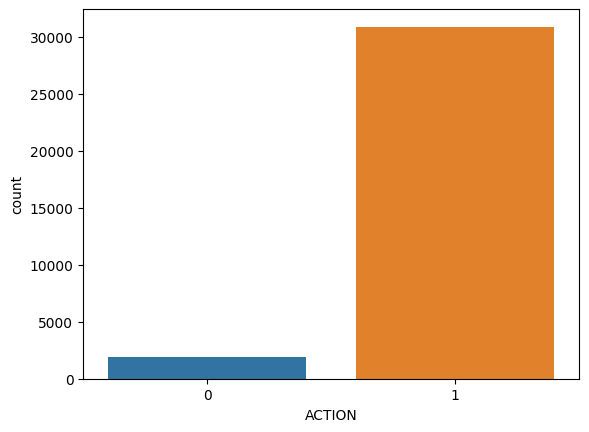

In [ ]:
print(df['ACTION'].mean())
sns.countplot(x='ACTION', data=df)

найдём число значений у признаков

In [ ]:
for col_name in df.columns:
    print(col_name, len(df[col_name].unique()))

ACTION 2
RESOURCE 7518
MGR_ID 4243
ROLE_ROLLUP_1 128
ROLE_ROLLUP_2 177
ROLE_DEPTNAME 449
ROLE_TITLE 343
ROLE_FAMILY_DESC 2358
ROLE_FAMILY 67
ROLE_CODE 343


In [ ]:
X = df.drop(['ACTION'], axis=1)
y = df['ACTION']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.33)

In [ ]:
model = KNeighborsClassifier(n_neighbors=5, p=2)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.34      0.09      0.14       614
           1       0.95      0.99      0.97     10200

    accuracy                           0.94     10814
   macro avg       0.64      0.54      0.55     10814
weighted avg       0.91      0.94      0.92     10814



<Axes: >

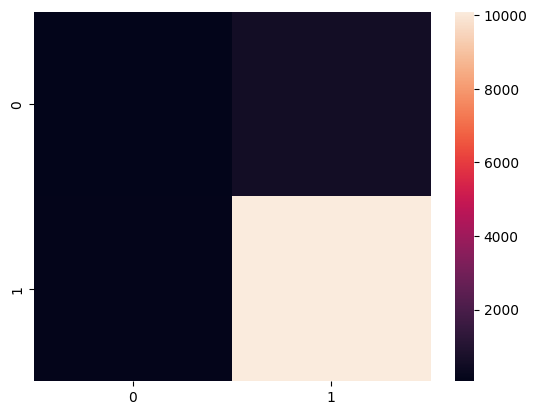

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred))

In [ ]:
p = (1,2,4,6)
for i in p:
    model = KNeighborsClassifier(n_neighbors=10, p=i)
    model.fit(X_test,y_test)
    cross = cross_val_score(model,X_train,y_train,cv=5)
    print(i,cross.mean(),cross.std())

1 0.9398314734684583 0.001275335914370283
2 0.9396492826235482 0.0013890185089480075
4 0.9396948303347757 0.001299507412223852
6 0.9398314734684583 0.0011999034272210684


создадим новые признаки, из столбцов data_combo, с целью улучшения
 предсказательной способности модели.

In [ ]:
data = pd.DataFrame(index=df.index)
for col_name in df.columns:
    if col_name == 'ACTION':
        continue
    ds = df.groupby(col_name).count()['ACTION']
    a = df[col_name].apply(lambda x: ds[x])
    ac =df.groupby(col_name).sum()["ACTION"]
    b = df[col_name].apply(lambda x:ac[x])
    c= (b + 1)/(a+2)
    data[col_name+ '_Counts'] = a
    data[col_name+ '_successes'] = b
    data[col_name+ '_smoothness'] = c

In [ ]:
X = data
y = df['ACTION']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.33)

In [ ]:
model = KNeighborsClassifier(n_neighbors=5, p=2)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
cross_val_score(model,X_test,y_test,cv=5).mean()

              precision    recall  f1-score   support

           0       0.54      0.28      0.37       614
           1       0.96      0.99      0.97     10200

    accuracy                           0.95     10814
   macro avg       0.75      0.63      0.67     10814
weighted avg       0.93      0.95      0.94     10814



0.9422048470556235

              precision    recall  f1-score   support

           0       0.54      0.28      0.37       614
           1       0.96      0.99      0.97     10200

    accuracy                           0.95     10814
   macro avg       0.75      0.63      0.67     10814
weighted avg       0.93      0.95      0.94     10814



<Axes: >

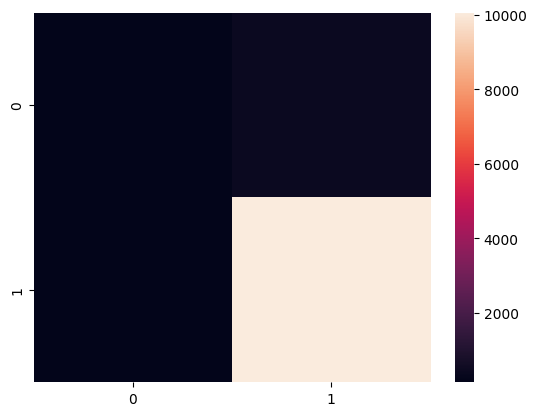

In [ ]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred))

качество метода  ближайших соседей с наилучшим
 (с фолдингом и без)

In [ ]:
df_combo = df.copy()

In [ ]:
data_combo = pd.DataFrame(index=df_combo.index)
for col_name in df_combo.columns:
  if col_name == 'ACTION':
    continue
  for j in df_combo:
    if j == col_name:
      continue
    if col_name == 'ACTION':
      continue
    new_colum=df_combo[col_name].astype(str) + '_'+df_combo[j].astype(str)
    data_combo[col_name+j] = new_colum

In [ ]:
data_combo = data_combo.join(df['ACTION'])

In [ ]:
data_combo_n = pd.DataFrame(index=df_combo.index)
for col_name in data_combo:
    if col_name == 'ACTION':
        continue
    ds = data_combo.groupby(col_name).count()['ACTION']
    a = data_combo[col_name].apply(lambda x: ds[x])
    ac =data_combo.groupby(col_name).sum()["ACTION"]
    b = data_combo[col_name].apply(lambda x:ac[x])
    c= (b + 1)/(a+2)
    data_combo_n[col_name+ '_Counts'] = a
    data_combo_n[col_name+ '_successes'] = b
    data_combo_n[col_name+ '_smoothness'] = c

<ipython-input-90-2286be11ff89>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ac =data_combo.groupby(col_name).sum()["ACTION"]
<ipython-input-90-2286be11ff89>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ac =data_combo.groupby(col_name).sum()["ACTION"]
<ipython-input-90-2286be11ff89>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ac =data_combo.groupby(col_name).sum()["ACTION"]
<ipython-input-90-2286be11ff89>:7:

In [ ]:
data_combo_n

,RESOURCEACTION_Counts,RESOURCEACTION_successes,RESOURCEACTION_smoothness,RESOURCEMGR_ID_Counts,RESOURCEMGR_ID_successes,RESOURCEMGR_ID_smoothness,RESOURCEROLE_ROLLUP_1_Counts,RESOURCEROLE_ROLLUP_1_successes,RESOURCEROLE_ROLLUP_1_smoothness,RESOURCEROLE_ROLLUP_2_Counts,...,ROLE_CODEROLE_DEPTNAME_smoothness,ROLE_CODEROLE_TITLE_Counts,ROLE_CODEROLE_TITLE_successes,ROLE_CODEROLE_TITLE_smoothness,ROLE_CODEROLE_FAMILY_DESC_Counts,ROLE_CODEROLE_FAMILY_DESC_successes,ROLE_CODEROLE_FAMILY_DESC_smoothness,ROLE_CODEROLE_FAMILY_Counts,ROLE_CODEROLE_FAMILY_successes,ROLE_CODEROLE_FAMILY_smoothness
0,3,3,0.800000,3,3,0.800000,3,3,0.800000,3,...,0.958333,3583,3467,0.967364,2607,2528,0.969337,3583,3467,0.967364
1,29,29,0.967742,1,1,0.666667,26,25,0.928571,11,...,0.857143,81,78,0.951807,12,12,0.928571,81,78,0.951807
2,2,2,0.750000,1,1,0.666667,2,2,0.750000,2,...,0.865591,1256,1117,0.888712,2,2,0.750000,1256,1117,0.888712
3,1,1,0.666667,1,1,0.666667,1,1,0.666667,1,...,0.970588,4649,4279,0.920232,531,508,0.954972,4649,4279,0.920232
4,8,8,0.900000,2,2,0.750000,3,3,0.800000,2,...,0.875000,75,65,0.857143,17,16,0.894737,75,65,0.857143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32764,46,46,0.979167,1,1,0.666667,30,26,0.843750,10,...,0.970588,4649,4279,0.920232,531,508,0.954972,4649,4279,0.920232
32765,2,2,0.750000,1,1,0.666667,1,1,0.666667,1,...,0.800000,24,24,0.961538,3,3,0.800000,24,24,0.961538
32766,155,155,0.993631,1,1,0.666667,138,134,0.964286,90,...,0.800000,3,3,0.800000,2,2,0.750000,3,3,0.800000
32767,7,7,0.888889,1,1,0.666667,1,1,0.666667,1,...,0.947368,394,360,0.911616,223,199,0.888889,394,360,0.911616


              precision    recall  f1-score   support

           0       0.54      0.28      0.37       614
           1       0.96      0.99      0.97     10200

    accuracy                           0.95     10814
   macro avg       0.75      0.63      0.67     10814
weighted avg       0.93      0.95      0.94     10814



<Axes: >

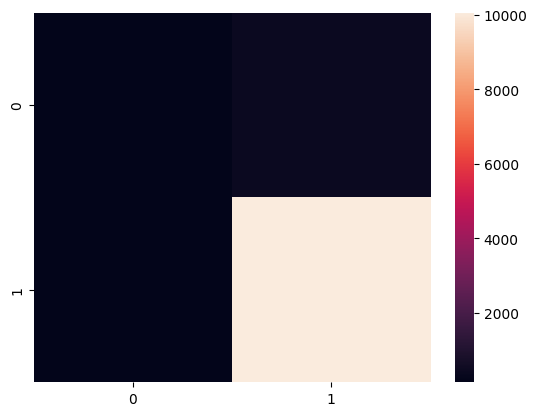

In [ ]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred))

Как итог, различными способами нам удалось немного улучшить качество
